In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/data/'

In [ ]:
import pandas as pd
import sqlite3 as sql
import datetime as dt
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(path+'raw/2018.csv')
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


# Pandas Version

### Day of the week
Convert datetime column FL_DATE to another column with day of week

In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['day_of_week'] = df['FL_DATE'].dt.day_name()

Time taken:  0.4756507873535156
  day_of_week  ARR_DELAY
0      Friday   7.223374
1      Monday   6.135493
2    Saturday   1.777479
3      Sunday   4.281940
4    Thursday   6.673045
5     Tuesday   4.777733
6   Wednesday   3.795352


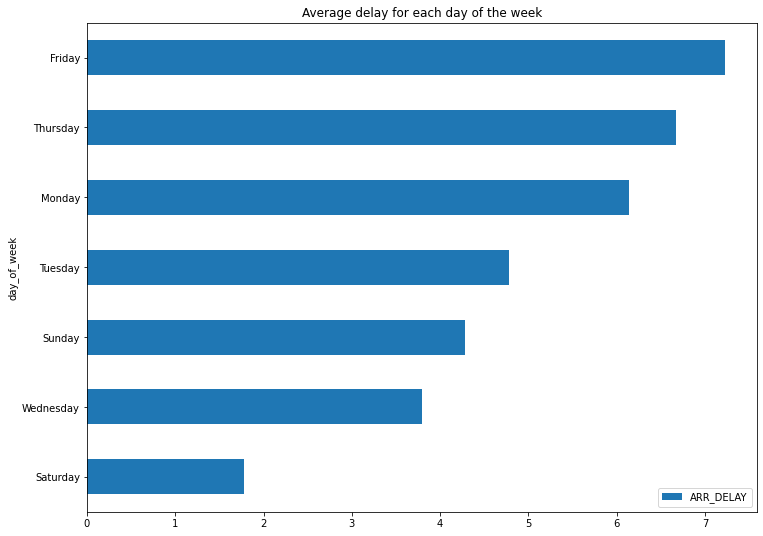

In [ ]:
start = time.time()
df_day = df.groupby('day_of_week')['ARR_DELAY'].mean().reset_index()
end = time.time()

print('Time taken: ',end-start)
print(df_day)

df_day.sort_values(['ARR_DELAY'], ascending=True).plot(
    kind='barh',
    x='day_of_week',
    y='ARR_DELAY',
    title='Average delay for each day of the week',
    figsize=(12,9))

### Best/Worst airlines (in terms of delay)

Time taken:  0.399517297744751
   OP_CARRIER  ARR_DELAY
0          9E   4.452778
1          AA   5.432065
2          AS  -0.501562
3          B6  11.432516
4          DL  -0.289825
5          EV   8.800700
6          F9  14.213311
7          G4   9.983518
8          HA   0.851310
9          MQ   5.357280
10         NK   5.171453
11         OH   8.237351
12         OO   7.044141
13         UA   5.764875
14         VX   1.727978
15         WN   4.519644
16         YV   8.853066
17         YX   3.076687


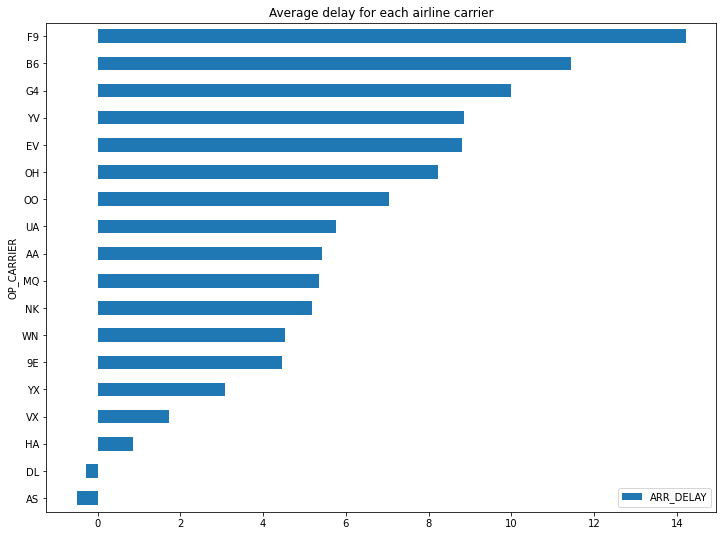

In [ ]:
start = time.time()
df_airlines = df.groupby('OP_CARRIER')['ARR_DELAY'].mean().reset_index()
end = time.time()

print('Time taken: ',end-start)
print(df_airlines)

df_airlines.sort_values(['ARR_DELAY'], ascending=True).plot(
    kind='barh',
    x='OP_CARRIER',
    y='ARR_DELAY',
    title='Average delay for each airline carrier',
    figsize=(12,9))

### Line profiler to check efficiency

In [ ]:
!pip install line_profiler

     |████████████████████████████████| 67 kB 3.2 MB/s 


In [ ]:
%load_ext line_profiler

In [ ]:
def pandas_profile(df):
  df = pd.read_csv(path+'raw/2018.csv')
  df_airlines = df.groupby('OP_CARRIER')['ARR_DELAY'].mean().reset_index()

In [ ]:
%lprun -f pandas_profile df = pandas_profile(df)

# SQL Version

In [ ]:
conn = sql.connect('airlines.db')
df.to_sql('airlines',conn)

In [ ]:
sql_query = 'SELECT OP_CARRIER, AVG(ARR_DELAY) FROM airlines GROUP BY airlines.OP_CARRIER'

start = time.time()
res = pd.read_sql(sql_query, conn)
end = time.time()
print('Time taken: ',end-start)

In [ ]:
print(res)

### Line profiler to check efficiency

In [ ]:
def sql_profile(df):
  df = pd.read_csv(path+'raw/2018.csv')
  conn = sql.connect('airlines.db')
  df.to_sql('airlines',conn)

  sql_query = 'SELECT OP_CARRIER, AVG(ARR_DELAY) FROM airlines GROUP BY airlines.OP_CARRIER'
  res = pd.read_sql(sql_query, conn)

In [ ]:
%lprun -f sql_profile df = sql_profile(df)